# Checkpoint 1 - Clustering and Outlier Detection
You need to:
- represent the dataset in a vector space,
- perform exploratory data analysis (averages, distributions, ...) of the dataset after data cleaning and report the data cleaning step and the results of the analysis
- apply at least one clustering or outlier detection method,
- report at least one limitation that cannot be resolved with the current tools.
- compare the results using a simpler baseline or another method. (Compare with DBSCAN)

Only methods covered in Module 1 may be used.

## Dataset

Explain the dimensions we have:
- user_id
- checkin_time
- latitude
- longtiude
- location_id

## Exploratory Data Analysis

In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Input data
df = pd.read_csv("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\Gowalla Data\\Gowalla_totalCheckins.txt", sep = "\t", header = None)
# read csv is still using local file path.
headers = ["user_id", "checkin_time", "latitude", "longitude", "location_id"]
df.columns = headers
print(df.head())

   user_id          checkin_time   latitude  longitude  location_id
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878


### Data Cleaning Process

Text(0, 0.5, 'Latitude')

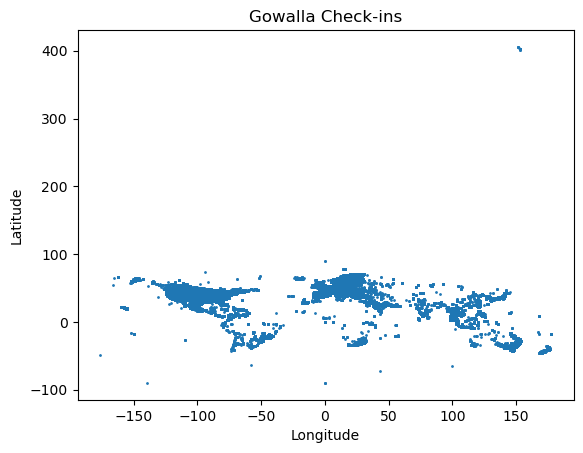

In [5]:
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

(explain that there are invalid data points, so they need to be cleaned)

The data that we use contains Latitude and Longitude data. Since Latitude can only go up to 90 both North and South, and Longitude only going up to 180 West and East, values above this threshold are considered invalid and are removed.

Text(0, 0.5, 'Latitude')

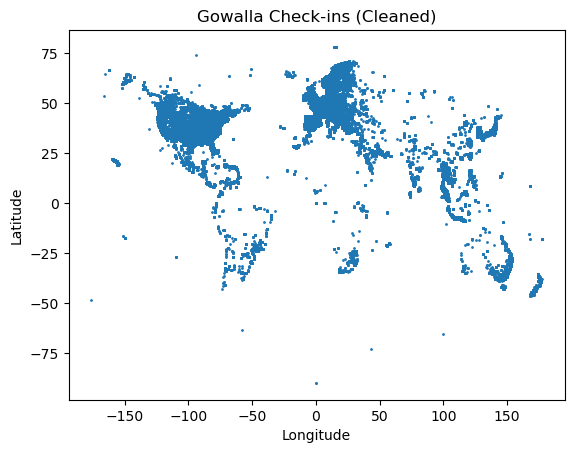

In [6]:
#Removing invalid data
df = df.drop(df[abs(df['latitude']) >= 90].index)
df = df.drop(df[abs(df['longitude']) >= 180].index)
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins (Cleaned)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [ ]:
# Used ChatGPT to find this library and how to use it, after getting stuck with geopy.

import reverse_geocoder as rg

coordinates = list(zip(df['latitude'], df['longitude']))
result = rg.search(coordinates)

df["country_code"] = [result[i]['cc'] for i in range(len(result))]
df["country_code"] = df["country_code"].str.lower() #for pygal
print(df.head())

   user_id          checkin_time   latitude  longitude  location_id  \
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847   
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315   
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637   
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516   
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878   

  country_code  
0           us  
1           us  
2           us  
3           us  
4           us  


In [32]:
import country_converter as coco
from tabulate import tabulate
cc = coco.CountryConverter()

mapping = {
    code: cc.convert(code, to="name")
    for code in df["country_code"].unique()
}

df["country_name"] = df["country_code"].map(mapping)
print(df.head())

   user_id              checkin_time   latitude  longitude  location_id  \
0        0 2010-10-19 23:55:27+00:00  30.235909 -97.795140        22847   
1        0 2010-10-18 22:17:43+00:00  30.269103 -97.749395       420315   
2        0 2010-10-17 23:42:03+00:00  30.255731 -97.763386       316637   
3        0 2010-10-17 19:26:05+00:00  30.263418 -97.757597        16516   
4        0 2010-10-16 18:50:42+00:00  30.274292 -97.740523      5535878   

  country_code   country_name  
0           us  United States  
1           us  United States  
2           us  United States  
3           us  United States  
4           us  United States  


In [33]:
country_counts = df["country_name"].value_counts().to_dict()
print(tabulate(country_counts.items(), headers=["Country Code", "Check-in Count"]))

Country Code                            Check-in Count
------------------------------------  ----------------
United States                                  3615430
Sweden                                          926870
Germany                                         349920
United Kingdom                                  272971
Norway                                          154545
Canada                                          129011
Netherlands                                      76623
Saudi Arabia                                     75110
Thailand                                         69779
Belgium                                          68835
Australia                                        64237
Switzerland                                      58650
Japan                                            51159
Puerto Rico                                      35147
France                                           34510
Spain                                            34126
Czechia   

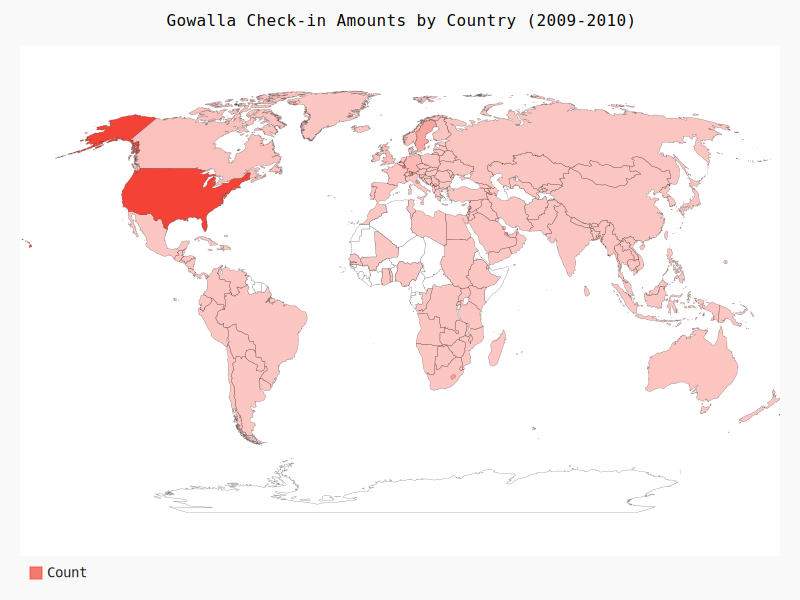

In [ ]:
# import pygal library
from pygal_maps_world.maps import World
from IPython.display import SVG

# create a world map
worldmap =  World()

# set the title of the map
worldmap.title = 'Gowalla Check-in Amounts by Country (2009-2010)'

# adding the countries
worldmap.add('Count', {
    country_code: count for country_code, count in country_counts.items() if country_code is not None
})

# render map
worldmap.render_to_file('gowalla_checkins_worldmap.svg')
SVG(worldmap.render(legend_at_bottom=True)) #Color not yet defined

# Sources used:
# https://www.geeksforgeeks.org/python/plotting-world-map-using-pygal-in-python/
# https://www.pygal.org/en/3.0.0/documentation/types/maps/pygal_maps_world.html
# https://pypi.org/project/reverse_geocoder/
# https://pypi.org/project/country-converter/

In [23]:
# Converting to a datetime datatype, use not yet known
df['checkin_time'] = pd.to_datetime(df['checkin_time'], errors='coerce')
print(df.dtypes)

user_id                       int64
checkin_time    datetime64[ns, UTC]
latitude                    float64
longitude                   float64
location_id                   int64
country_code                 object
dtype: object


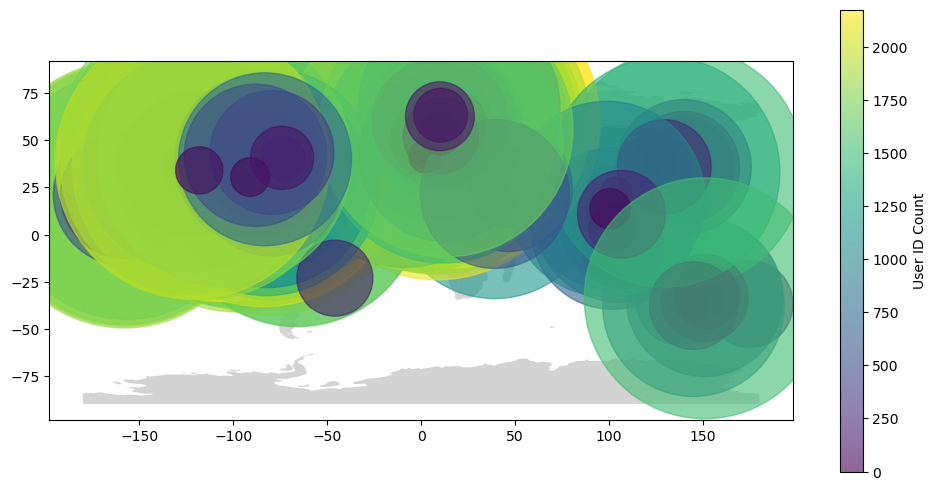

In [ ]:
#DO NOT RUN THIS CELL, IT IS NOT THE EXPECTED OUTPUT
import random

#Get world map data
world = gpd.read_file("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)

random.seed(42)  # For reproducibility
randomlist = random.sample(range(0, len(df)), 1000)

x = df['longitude'].iloc[randomlist]
y = df['latitude'].iloc[randomlist]
z = df['user_id'].value_counts().loc[df['user_id'].iloc[randomlist]].values
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0)
plt.colorbar(label='User ID Count')


## Clustering / Outlier Detection Method

## Comparison

## Limitations